In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/Clothing_Store_Sales_Data.csv')
print(df.head())
print(df.info())

   Unnamed: 0 InvoiceNo    Store ItemCategory   Price  Quantity  TotalAmount  \
0        9480  INV01178  Store B        Shoes  146.79         4       587.16   
1        9684  INV01936  Store B  Accessories   43.05         2        86.10   
2         744  INV01525  Store A      Jackets   51.97         1        51.97   
3        3866  INV00704  Store A      Dresses  184.41         1       184.41   
4        8741  INV00491  Store A        Jeans   36.75         3       110.25   

                         Date PaymentMethod  
0  2021-08-14 18:41:07.972843   Credit Card  
1  2021-08-14 18:41:07.972843          Cash  
2  2021-08-14 18:41:07.972843    Debit Card  
3  2021-08-14 18:41:07.972843          Cash  
4  2021-08-14 18:41:07.972843    Debit Card  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     10000 non-null  int64  
 1  

In [5]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 Unnamed: 0       0
InvoiceNo        0
Store            0
ItemCategory     0
Price            0
Quantity         0
TotalAmount      0
Date             0
PaymentMethod    0
dtype: int64


In [9]:
#Total sales were calculated for each store
total_sales_by_store = df.groupby("Store")["TotalAmount"].sum()
print(total_sales_by_store)

Store
Store A    893812.07
Store B    884348.56
Store C    880232.57
Name: TotalAmount, dtype: float64


In [13]:
#average price was calculated for each product category.
avg_price_by_category = df.groupby("ItemCategory")["Price"].mean()
print(avg_price_by_category.head())

ItemCategory
Accessories    105.001927
Dresses        104.653783
Jackets        105.643568
Jeans          106.428597
Shoes          106.864391
Name: Price, dtype: float64


In [15]:
#total quantity sold was calculated for each store.
total_quantity_by_store = df.groupby("Store")["Quantity"].sum()
print(total_quantity_by_store)

Store
Store A    8486
Store B    8426
Store C    8262
Name: Quantity, dtype: int64


In [20]:
#distribution of payment methods was calculated.
payment_dist = df["PaymentMethod"].value_counts()
print(payment_dist)

PaymentMethod
Credit Card       2541
Online Payment    2523
Debit Card        2488
Cash              2448
Name: count, dtype: int64


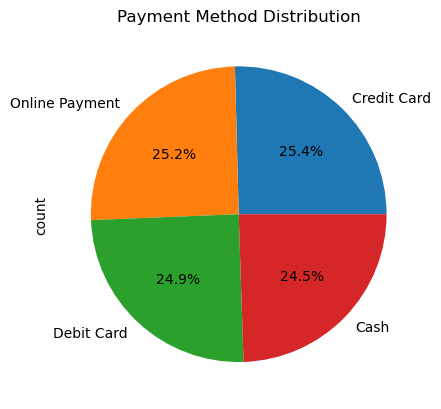

In [96]:
df["PaymentMethod"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Payment Method Distribution")
plt.show()

In [24]:
#average total amount was computed for each product category.
avg_total_by_category = df.groupby("ItemCategory")["TotalAmount"].mean()
print(avg_total_by_category.head())

ItemCategory
Accessories    264.627512
Dresses        267.435089
Jackets        266.538889
Jeans          262.937364
Shoes          269.430818
Name: TotalAmount, dtype: float64


In [30]:
#The top 5 product categories were identified based on total sales.
top_categories = df.groupby("ItemCategory")["TotalAmount"].sum().nlargest(5)
print(top_categories)

ItemCategory
Jeans          449885.83
T-Shirts       449062.75
Jackets        443787.25
Accessories    443515.71
Shoes          438094.51
Name: TotalAmount, dtype: float64


In [32]:
#Total sales were grouped by payment method to assess impact.
sales_by_payment = df.groupby("PaymentMethod")["TotalAmount"].sum()
print(sales_by_payment)

PaymentMethod
Cash              653127.64
Credit Card       658713.17
Debit Card        661027.44
Online Payment    685524.95
Name: TotalAmount, dtype: float64


In [34]:
#Total sales were calculated for each date.
sales_by_date = df.groupby("Date")["TotalAmount"].sum()
print(sales_by_date.head())

Date
2021-08-14 18:41:07.972843    4852.40
2021-08-15 18:41:07.972843    1907.17
2021-08-16 18:41:07.972843    2393.28
2021-08-17 18:41:07.972843    1090.25
2021-08-18 18:41:07.972843    1550.84
Name: TotalAmount, dtype: float64


In [40]:
#Average quantity sold was computed for each product category.
avg_quantity_by_category = df.groupby("ItemCategory")["Quantity"].mean()
print(avg_quantity_by_category.head())

ItemCategory
Accessories    2.523270
Dresses        2.548367
Jackets        2.534535
Jeans          2.485681
Shoes          2.514760
Name: Quantity, dtype: float64


In [44]:
#percentage distribution of payment methods was calculated.
payment_ratio = df["PaymentMethod"].value_counts(normalize=True) * 100
print(payment_ratio)

PaymentMethod
Credit Card       25.41
Online Payment    25.23
Debit Card        24.88
Cash              24.48
Name: proportion, dtype: float64


In [48]:
#Average quantity sold was calculated for each price point.
price_vs_quantity = df.groupby("Price")["Quantity"].mean()
print(price_vs_quantity.head())

Price
10.00    3.5
10.04    3.0
10.05    1.0
10.06    2.0
10.09    1.0
Name: Quantity, dtype: float64


In [52]:
#Sales totals were calculated by day of the week.
df['Date'] = pd.to_datetime(df['Date'])
sales_by_day = df.groupby(df['Date'].dt.day_name())["TotalAmount"].sum()
print(sales_by_day)

Date
Friday       383587.97
Monday       359305.43
Saturday     390386.74
Sunday       392506.13
Thursday     374287.77
Tuesday      372479.30
Wednesday    385839.86
Name: TotalAmount, dtype: float64


In [56]:
#The top 5 invoices were identified based on total amount.
top_invoices = df.groupby("InvoiceNo")["TotalAmount"].sum().nlargest(5)
print(top_invoices)

InvoiceNo
INV01953    4572.92
INV00559    4162.43
INV01379    4106.40
INV01694    3924.98
INV00485    3916.36
Name: TotalAmount, dtype: float64


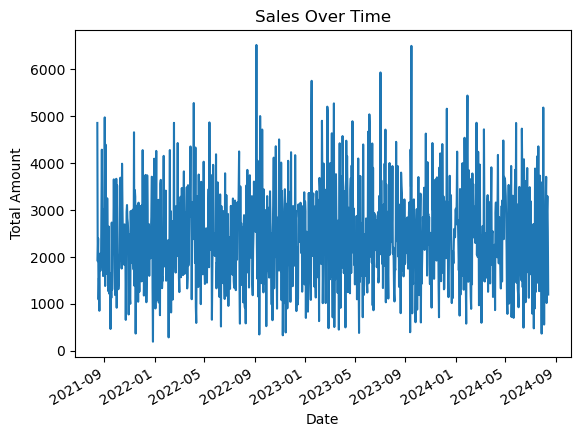

In [58]:
df.groupby("Date")["TotalAmount"].sum().plot(kind="line")
plt.title("Sales Over Time")
plt.ylabel("Total Amount")
plt.show()

In [62]:
#Price distribution statistics were generated by product category.
price_dist_by_category = df.groupby("ItemCategory")["Price"].describe()
print(price_dist_by_category.head())

               count        mean        std    min      25%      50%  \
ItemCategory                                                           
Accessories   1676.0  105.001927  54.697527  10.20  58.0075  104.715   
Dresses       1623.0  104.653783  54.519923  10.06  58.4500  102.910   
Jackets       1665.0  105.643568  55.140175  10.00  57.0100  107.130   
Jeans         1711.0  106.428597  55.554192  10.05  58.0350  108.340   
Shoes         1626.0  106.864391  55.672657  10.09  58.7425  106.305   

                   75%     max  
ItemCategory                    
Accessories   152.4425  199.98  
Dresses       151.9750  199.86  
Jackets       152.3400  199.94  
Jeans         154.7700  199.97  
Shoes         154.7825  199.96  


In [66]:
#average total amount was calculated per store and product category.
sales_by_store_category = df.groupby(["Store", "ItemCategory"])["TotalAmount"].mean()
print(sales_by_store_category.head())

Store    ItemCategory
Store A  Accessories     265.769943
         Dresses         273.189514
         Jackets         265.050753
         Jeans           264.503186
         Shoes           263.107113
Name: TotalAmount, dtype: float64


In [70]:
# The top 5 stores were selected based on total quantity sold.
top_stores_by_quantity = df.groupby("Store")["Quantity"].sum().nlargest(5)
print(top_stores_by_quantity)

Store
Store A    8486
Store B    8426
Store C    8262
Name: Quantity, dtype: int64


In [74]:
#average total amount was calculated per quantity level.
quantity_vs_total = df.groupby("Quantity")["TotalAmount"].mean()
print(quantity_vs_total.head())

Quantity
1    106.442816
2    210.460055
3    319.179862
4    420.058852
Name: TotalAmount, dtype: float64


In [82]:
#Total sales were aggregated by month.
df['Date'] = pd.to_datetime(df['Date'])
sales_by_month = df.groupby(df['Date'].dt.to_period('M'))["TotalAmount"].sum()
print(sales_by_month.head())

Date
2021-08    41656.72
2021-09    65063.00
2021-10    72547.85
2021-11    67049.12
2021-12    75957.15
Freq: M, Name: TotalAmount, dtype: float64


In [88]:
#The average product price was calculated for each payment method.
avg_price_by_payment = df.groupby("PaymentMethod")["Price"].mean()
print(avg_price_by_payment)

PaymentMethod
Cash              105.061422
Credit Card       104.873156
Debit Card        105.355912
Online Payment    107.708656
Name: Price, dtype: float64


In [90]:
#The percentage of product categories sold was calculated per store.
category_ratio_by_store = df.groupby("Store")["ItemCategory"].value_counts(normalize=True) * 100
print(category_ratio_by_store.head())

Store    ItemCategory
Store A  T-Shirts        17.612118
         Jeans           17.523018
         Shoes           16.869617
         Jackets         16.572617
         Dresses         15.889516
Name: proportion, dtype: float64


In [94]:
#top 5 invoices were determined based on quantity sold.
top_quantity_invoices = df.groupby("InvoiceNo")["Quantity"].sum().nlargest(5)
print(top_quantity_invoices)

InvoiceNo
INV01953    39
INV01939    38
INV00559    35
INV00936    35
INV01379    34
Name: Quantity, dtype: int64


In [104]:
# Monthly total sales were calculated per store.
df['Date'] = pd.to_datetime(df['Date'])
sales_by_store_month = df.groupby(["Store", df['Date'].dt.to_period('M')])["TotalAmount"].sum()
print(sales_by_store_month.head())

Store    Date   
Store A  2021-08    13392.57
         2021-09    24135.06
         2021-10    24298.86
         2021-11    24687.80
         2021-12    19343.62
Name: TotalAmount, dtype: float64


In [106]:
#top 5 days were selected based on highest total sales.
top_sales_days = df.groupby(df['Date'].dt.date)["TotalAmount"].sum().nlargest(5)
print(top_sales_days)

Date
2022-09-04    6513.65
2023-09-15    6494.37
2023-07-02    5928.06
2023-01-16    5750.09
2024-01-29    5435.62
Name: TotalAmount, dtype: float64


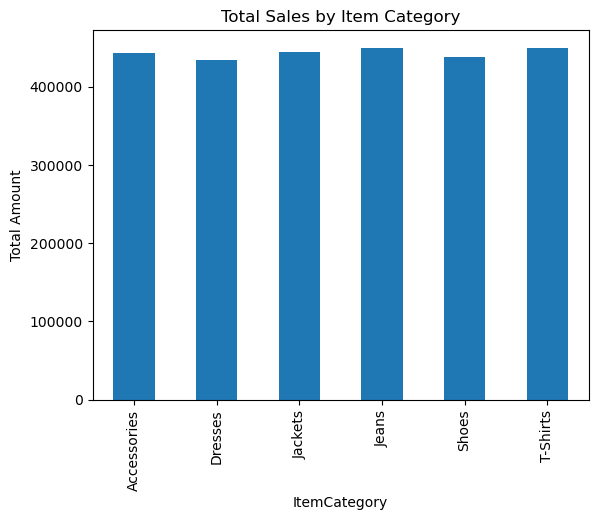

In [107]:
df.groupby("ItemCategory")["TotalAmount"].sum().plot(kind="bar")
plt.title("Total Sales by Item Category")
plt.ylabel("Total Amount")
plt.show()

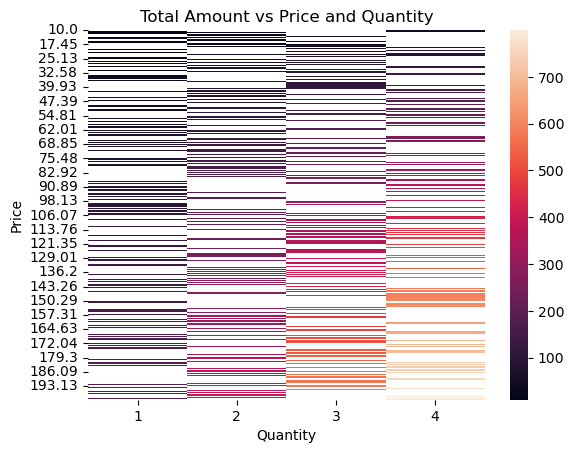

In [108]:
#A heatmap was used to analyze price and quantity impact:
pivot = df.pivot_table(values="TotalAmount", index="Price", columns="Quantity", aggfunc="mean")
sns.heatmap(pivot)
plt.title("Total Amount vs Price and Quantity")
plt.show()